# Actividad en Grupo: Análisis de Comentarios de Clientes Utilizando Redes Neuronales Recurrentes (RNN)

## Escenario
Su equipo ha sido contratado por una empresa de turismo que desea categorizar automáticamente los comentarios de sus clientes en función de los sentimientos: positivos, neutrales o negativos. La empresa ha proporcionado un conjunto de datos de comentarios y clasificaciones (rating) de clientes para que su equipo lo analice.

## Objetivo
Utilizar Redes Neuronales Recurrentes (RNN) para crear un modelo de análisis de sentimientos. Su tarea también implica interpretar los resultados para obtener conocimientos empresariales accionables.

## Tareas

1. **Exploración de Datos**
   - Revise una muestra de comentarios. ¿Cuáles son los temas o patrones comunes?
   - Visualice la distribución de longitudes de los comentarios.
   - Visualice la distribución de las clasificaciones (positivo, neutro, negativo).



In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos desde el archivo CSV
datos = pd.read_csv('Datos.csv')

# Mostrar las primeras filas para entender la estructura de los datos
print(datos.head())


   ID                                 title  rating  \
0   0                   IMPOSIBLE DESCANSAR       2   
1   1          No es oro todo lo que reluce       3   
2   2        Un buen hotel con mucho ruido.       3   
3   3  SIN CALEFACCIÓN OPERATIVA Y CON FRÍO       2   
4   4             Deja bastante que desear.       2   

                                         review_text  \
0  El fin de semana mi pareja y yo hicimos una re...   
1  El hotel en general está bien, las habtiacione...   
2  El hotel es moderno, amplio y limpio, pero no ...   
3  Calefacción averiada o no operativa. Se coment...   
4  Este hotel ha bajado notoriamente su categoria...   

                                location                hotel  label  
0  Seville_Province_of_Seville_Andalucia  Hotel_Rey_Alfonso_X      0  
1  Seville_Province_of_Seville_Andalucia  Hotel_Rey_Alfonso_X      3  
2  Seville_Province_of_Seville_Andalucia  Hotel_Rey_Alfonso_X      3  
3  Seville_Province_of_Seville_Andalucia        

In [28]:
# Verificar si hay valores nulos en el dataset
print(datos.isnull().sum())

# Eliminar filas con valores nulos en las columnas críticas
columnas_criticas = ['ID', 'title', 'rating', 'review_text', 'location', 'hotel']
datos_limpios = datos.dropna(subset=columnas_criticas)

# Verificar nuevamente si hay valores nulos
print(datos_limpios.isnull().sum())


ID               0
title            0
rating           0
review_text      0
location       796
hotel          796
label            0
dtype: int64
ID             0
title          0
rating         0
review_text    0
location       0
hotel          0
label          0
dtype: int64


In [29]:
# Mostrar una muestra aleatoria de comentarios
muestra_comentarios = datos_limpios['review_text'].sample(10, random_state=1)
print(muestra_comentarios)
# Mostrar una muestra aleatoria de comentarios
muestra_comentarios = datos_limpios['review_text'].sample(10, random_state=1)
print(muestra_comentarios)

# TODO: Cuáles son los temas o patrones comunes?

313     Estancia de un solo día con mi marido y dos ni...
7520    Estuve 4 noches. Muy cálido el ambiente del ho...
5290    Magnífico hotel con una excelente ubicación. C...
6218    Nos alojamos en este hotel de 5 estrellas gran...
2754    La primera impresión fue un poco decepcionante...
3876    Hotel con muchas deficiencias. El wifi no me f...
1740    Es un hotel bien situado y aceptable, una buen...
2893    Reservamos una habitación con cama doble que f...
1513    Una cerveza 4 euros. No digo más. T cobran x l...
5115    Es un hotel increible. Sus jardines, sus patio...
Name: review_text, dtype: object
313     Estancia de un solo día con mi marido y dos ni...
7520    Estuve 4 noches. Muy cálido el ambiente del ho...
5290    Magnífico hotel con una excelente ubicación. C...
6218    Nos alojamos en este hotel de 5 estrellas gran...
2754    La primera impresión fue un poco decepcionante...
3876    Hotel con muchas deficiencias. El wifi no me f...
1740    Es un hotel bien situado y acep

/var/folders/4r/258hym592n3dj3lrhvdy09m80000gn/T/ipykernel_5283/14066857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_limpios['longitud_comentario'] = datos_limpios['review_text'].apply(len)


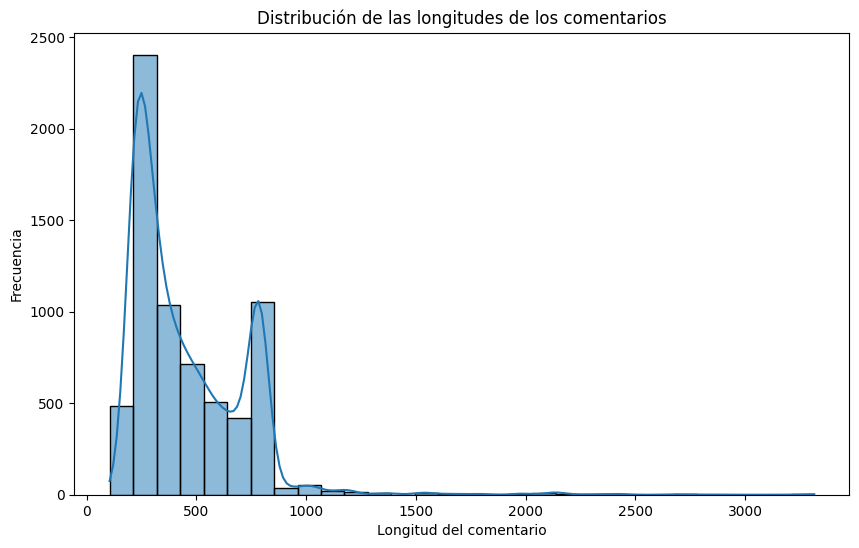

In [30]:
# Calcular las longitudes de los comentarios
datos_limpios['longitud_comentario'] = datos_limpios['review_text'].apply(len)

# Crear un histograma de las longitudes de los comentarios
plt.figure(figsize=(10, 6))
sns.histplot(datos_limpios['longitud_comentario'], bins=30, kde=True)
plt.title('Distribución de las longitudes de los comentarios')
plt.xlabel('Longitud del comentario')
plt.ylabel('Frecuencia')
plt.show()


/var/folders/4r/258hym592n3dj3lrhvdy09m80000gn/T/ipykernel_5283/3428683284.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_limpios['sentimiento'] = datos_limpios['rating'].apply(clasificacion_sentimiento)
/var/folders/4r/258hym592n3dj3lrhvdy09m80000gn/T/ipykernel_5283/3428683284.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentimiento', data=datos_limpios, palette='viridis')


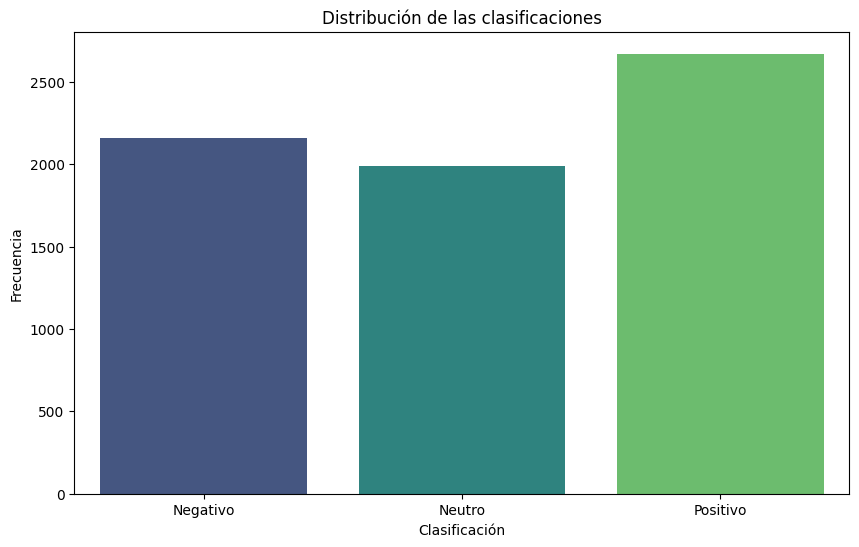

In [31]:
# Definir las clasificaciones como positivo (4-5), neutro (3) y negativo (1-2)
def clasificacion_sentimiento(rating):
    if rating >= 4:
        return 'Positivo'
    elif rating == 3:
        return 'Neutro'
    else:
        return 'Negativo'

# Aplicar la función de clasificación al dataset
datos_limpios['sentimiento'] = datos_limpios['rating'].apply(clasificacion_sentimiento)

# Crear un gráfico de barras para mostrar la distribución de las clasificaciones
plt.figure(figsize=(10, 6))
sns.countplot(x='sentimiento', data=datos_limpios, palette='viridis')
plt.title('Distribución de las clasificaciones')
plt.xlabel('Clasificación')
plt.ylabel('Frecuencia')
plt.show()



2. **Preprocesamiento de Datos**
   - Extraiga y Tokenice los comentarios.
   - Rellene secuencias para asegurar una longitud uniforme.
   - Convierta los valores de rating en sentimientos (positivo, neutro, negativo) y codifíquelo en valores numéricos.


In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Convertir los comentarios a una lista para el tokenizador
comentarios = datos_limpios['review_text'].tolist()

# Inicializar el tokenizador
tokenizer = Tokenizer()
tokenizer.fit_on_texts(comentarios)

# Convertir los textos a secuencias de enteros
secuencias = tokenizer.texts_to_sequences(comentarios)

# Mostrar una muestra de las secuencias tokenizadas
print(secuencias[:5])


[[5, 190, 1, 170, 44, 261, 3, 129, 556, 13, 149, 6, 37, 15, 12, 5, 190, 1, 293, 3, 2817, 56, 207, 13, 51, 3, 145, 97, 22, 2652, 7, 10, 2211, 66, 9243, 19, 15, 65, 22, 357, 4, 40, 74, 16, 293, 53, 4, 2, 151, 1, 256, 40, 9, 13455, 22, 608, 27, 65, 40, 266, 18, 4, 2413, 3, 1665, 56, 95, 370, 85, 14, 422, 1, 2, 214, 12, 447, 576, 18, 4, 4689, 4, 327, 113, 13456, 6, 2, 21, 1, 632, 1, 136, 8, 43, 1370, 5, 15, 1666, 3, 180, 160, 14, 734, 62, 63, 34, 14, 2818, 3646, 666, 3, 2819, 3413, 62, 18, 4, 256, 506, 2517, 207, 318, 16, 293, 1491, 6, 8, 165, 4, 5347, 35, 6047, 24, 56, 302, 17, 23, 447, 6048, 17, 359, 7573], [5, 15, 6, 211, 33, 27, 14, 13457, 46, 1038, 3, 5, 29, 11, 9, 67, 1371, 5, 1919, 19, 4283, 1492, 3, 2, 82, 3, 2, 86, 1, 2, 82, 11, 6049, 24, 43, 60, 354, 4284, 5, 576, 11, 4, 5, 308, 8, 2126, 27, 7, 2, 21, 53, 4, 20, 9244, 2311, 5, 735, 1920, 11, 4, 8, 20, 239, 1921, 153, 301, 4, 374, 10, 2212, 6050, 6, 112, 1, 13, 3647, 1922, 6, 175, 886, 6, 47], [5, 15, 11, 525, 437, 3, 80, 24, 8, 1

In [33]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Determinar la longitud máxima de las secuencias
longitud_maxima = max(len(secuencia) for secuencia in secuencias)

# Rellenar las secuencias para que todas tengan la misma longitud
secuencias_padded = pad_sequences(secuencias, maxlen=longitud_maxima, padding='post')

# Mostrar una muestra de las secuencias rellenadas
print(secuencias_padded[:5])


[[   5  190    1 ...    0    0    0]
 [   5   15    6 ...    0    0    0]
 [   5   15   11 ...    0    0    0]
 [ 520 5348   62 ...    0    0    0]
 [  37   15   73 ...    0    0    0]]


In [34]:
from sklearn.preprocessing import LabelEncoder

# Aplicar la función de clasificación al dataset
datos_limpios['sentimiento'] = datos_limpios['rating'].apply(clasificacion_sentimiento)

# Codificar los sentimientos en valores numéricos
encoder = LabelEncoder()
datos_limpios['sentimiento_numerico'] = encoder.fit_transform(datos_limpios['sentimiento'])

# Mostrar una muestra de los sentimientos codificados
print(datos_limpios[['rating', 'sentimiento', 'sentimiento_numerico']].head())


   rating sentimiento  sentimiento_numerico
0       2    Negativo                     0
1       3      Neutro                     1
2       3      Neutro                     1
3       2    Negativo                     0
4       2    Negativo                     0


/var/folders/4r/258hym592n3dj3lrhvdy09m80000gn/T/ipykernel_5283/3944574856.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_limpios['sentimiento'] = datos_limpios['rating'].apply(clasificacion_sentimiento)
/var/folders/4r/258hym592n3dj3lrhvdy09m80000gn/T/ipykernel_5283/3944574856.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_limpios['sentimiento_numerico'] = encoder.fit_transform(datos_limpios['sentimiento'])



3. **Construcción del Modelo RNN**
   - Cree un modelo secuencial.
   - Agregue capas de incrustación (embedding) para procesar las palabras tokenizadas.
   - Implemente capas LSTM o GRU para la parte recurrente.
   - Diseñe la capa de salida adecuada para un problema de clasificación de tres clases.

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [36]:

# Convertir las etiquetas a una forma categórica para la clasificación de tres clases
etiquetas_categoricas = to_categorical(datos_limpios['sentimiento_numerico'], num_classes=3)


In [37]:
# Número máximo de palabras en el tokenizador
num_palabras = len(tokenizer.word_index) + 1 

# Crear el modelo
modelo = Sequential()

# Agregar la capa de incrustación (embedding)
modelo.add(Embedding(input_dim=num_palabras, output_dim=128, input_length=longitud_maxima))
modelo.add(SpatialDropout1D(0.2))

# Agregar las capas LSTM
modelo.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

# Agregar la capa de salida (Softmax para clasificación en tres clases)
modelo.add(Dense(3, activation='softmax'))

# Compilar el modelo
modelo.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Resumen del modelo
modelo.summary()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_2             │ ?                      │   0 (unbuilt) │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


4. **Entrenamiento y Evaluación del Modelo**
   - Divida el conjunto de datos en entrenamiento, validación y prueba.
   - Entrene el modelo y valide su rendimiento.
   - Pruebe el modelo en el conjunto de prueba e interprete los resultados.

In [38]:
# Dividir los datos en entrenamiento (80%), validación (10%) y prueba (10%)
X_temp, X_test, y_temp, y_test = train_test_split(secuencias_padded, etiquetas_categoricas, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_valid.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (5523, 560)
Tamaño del conjunto de validación: (614, 560)
Tamaño del conjunto de prueba: (682, 560)


In [39]:
# Ajustar el modelo con los datos de entrenamiento y validación
historial = modelo.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_valid, y_valid), verbose=1)


Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 41s 443ms/step - accuracy: 0.3833 - loss: 1.0943 - val_accuracy: 0.4023 - val_loss: 1.0869
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 40s 462ms/step - accuracy: 0.3946 - loss: 1.0903 - val_accuracy: 0.4023 - val_loss: 1.0874
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 40s 460ms/step - accuracy: 0.4034 - loss: 1.0877 - val_accuracy: 0.4023 - val_loss: 1.0890
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 39s 444ms/step - accuracy: 0.4034 - loss: 1.0898 - val_accuracy: 0.4023 - val_loss: 1.0875
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 39s 445ms/step - accuracy: 0.4019 - loss: 1.0886 - val_accuracy: 0.4023 - val_loss: 1.0887
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 39s 444ms/step - accuracy: 0.3941 - loss: 1.0911 - val_accuracy: 0.4023 - val_loss: 1.0868
Epoch 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 39s 445ms/step - accuracy: 0.3981 - loss: 1.0883 - val_accuracy: 0.4023 - val_loss: 1.0877
Epoch 8/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 39s 450ms/step - accuracy: 0.3952 - loss: 1.0906 - val_accu

In [40]:
# Evaluar el modelo en el conjunto de prueba
perdida, precision = modelo.evaluate(X_test, y_test, verbose=1)

print("Pérdida en el conjunto de prueba:", perdida)
print("Precisión en el conjunto de prueba:", precision)

# Hacer predicciones en el conjunto de prueba
predicciones = modelo.predict(X_test)
predicciones_clases = predicciones.argmax(axis=1)
y_test_clases = y_test.argmax(axis=1)

# Mostrar la matriz de confusión y el reporte de clasificación para interpretar los resultados
from sklearn.metrics import confusion_matrix, classification_report

# Matriz de confusión
matriz_confusion = confusion_matrix(y_test_clases, predicciones_clases)
print("Matriz de Confusión:")
print(matriz_confusion)

# Reporte de clasificación
reporte_clasificacion = classification_report(y_test_clases, predicciones_clases, target_names=['Negativo', 'Neutro', 'Positivo'])
print("Reporte de Clasificación:")
print(reporte_clasificacion)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.3527 - loss: 1.0991
Pérdida en el conjunto de prueba: 1.0964313745498657
Precisión en el conjunto de prueba: 0.366568922996521
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step
Matriz de Confusión:
[[  0   0 216]
 [  0   0 216]
 [  0   0 250]]
Reporte de Clasificación:
              precision    recall  f1-score   support

    Negativo       0.00      0.00      0.00       216
      Neutro       0.00      0.00      0.00       216
    Positivo       0.37      1.00      0.54       250

    accuracy                           0.37       682
   macro avg       0.12      0.33      0.18       682
weighted avg       0.13      0.37      0.20       682



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  


5. **Análisis y Recomendaciones Empresariales**
   - Analice las clasificaciones incorrectas. ¿Existen ciertos tipos de comentarios con los que el modelo tiene dificultades?
   - ¿Cómo puede la empresa utilizar los resultados del modelo para mejorar sus servicios o productos?
   - ¿Cuáles son las posibles limitaciones de confiar en este modelo para tomar decisiones comerciales?



6. **Presentación**
   - Prepare una presentación de su análisis, resultados y recomendaciones.
   - Asegúrese de interpretar los resultados en un contexto empresarial.
